# Car Price Prediction Model

### Analyzing features

+ **Name** - The brand and model of the car.
+ **Year** -  The year of the car's model.
+ **Selling Price** -  The selling price of the car (to be predicted).
+ **KM driven** - The distance travelled of the car in kilometers.
+ **Fuel** - The fuel type of the car.
+ **Seller Type** -  The type of seller of the car listing.
+ **Transmission** - The type of transition of the car.
+ **Owner** - The number of previous owners of the car.
+ **Mileage** - The fuel efficiency of the car.
+ **Engine** - The engine power of the car.
+ **Max Power** - The horsepower of the car sent to the wheels.
+ **Torque** - The force generated by the car's engine.
+ **Seats** - The number of seats in the car.



### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

### Checking library versions

In [332]:
import matplotlib
np.__version__, pd.__version__,sns.__version__,matplotlib.__version__

('1.26.4', '2.2.2', '0.13.2', '3.9.2')

### 1. Load data


In [4]:
# Load the csv file into a variable
df = pd.read_csv('.\data\Cars.csv')

In [334]:
# Print the first five rows of dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [335]:
# Check the shape of the data
df.shape

(8128, 13)

In [336]:
# Print DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [337]:
# Checking the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2. Exploratory Data Analysis

The names of the columns are determined to not need renaming.

As per the instructions, the lines of data containing CNG and LPG as fuel, test drive cars as owner will be deleted. The column of torque will also be deleted.

In [338]:
df = df[df.fuel != "CNG"]


In [339]:
df = df[df.fuel != "LPG"]

In [340]:
df = df[df.owner != "Test Drive Car"]

In [341]:
df.pop("torque")

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8028, dtype: object

In [342]:
# Check the shape of the modified data
df.shape

(8028, 12)

### Label encoding

The replace method is used since LabelEncoder from sklearn does not allow for custom order. The map dictionary contains the order mapping of the owner column. Since rows containing "Test Drive Car" are already deleted, it is not included in the mapping.

In [343]:
map  = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3, 
    "Fourth & Above Owner": 4
    }

df.replace({"owner":map}, inplace = True)
df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


The columns "Mileage","Engine","Max Power" and "Name" are modified

In [344]:
df.mileage = df.mileage.str.split().str[0]
df.mileage = df.mileage.astype(float)

In [345]:
df.engine = df.engine.str.split().str[0]
df.engine = df.engine.astype(float)

In [346]:
df.max_power = df.max_power.str.split().str[0]
df.max_power =  df.max_power.astype(float)

In [347]:
df.name = df.name.str.split().str[0]

In [348]:
# Checking if modifications and data type changes are applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [349]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis
**Count Plot**

The "fuel", "transmission" and "seats" columns will be analyzed using count plot since the values of these columns contain only a few variations and count plot will clearly show the distribution of the values.

<Axes: xlabel='fuel', ylabel='count'>

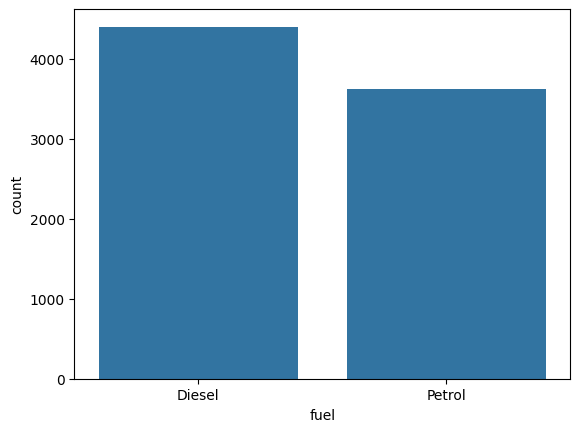

In [350]:
sns.countplot(data= df, x = "fuel")

<Axes: xlabel='transmission', ylabel='count'>

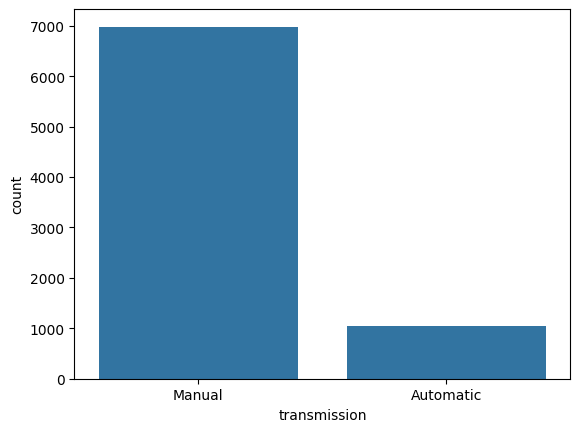

In [351]:
sns.countplot(data =df , x = "transmission")

<Axes: xlabel='seats', ylabel='count'>

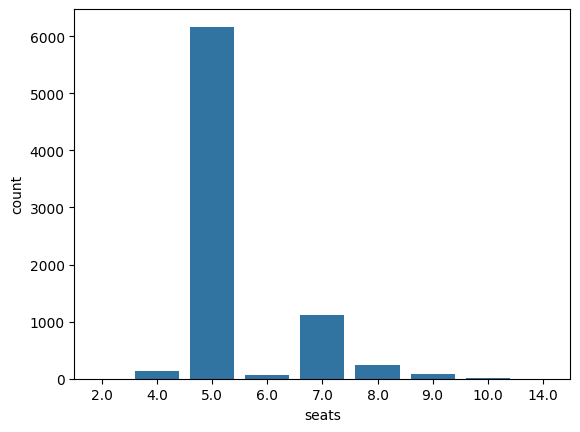

In [352]:
sns.countplot(data = df, x = 'seats')

We can observe that although the types of fuel of the cars are somewhat evenly distributed, the major of the cars have a manual transmission and are five seaters.

**Distribution Plot**

The "year" column will be analyzed by using distribution plot to see its distribution

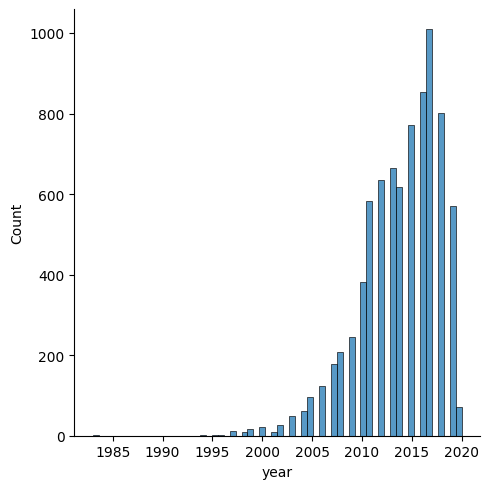

In [353]:
sns.displot(data= df, x = 'year')

### Multivariate Analysis
**Box Plot**

The "fuel" column will be analyzed using box plot in relation to the selling price of the car to see if any outliers exist and how the distribution impacts the price.

Text(0.5, 0, 'Fuel Name')

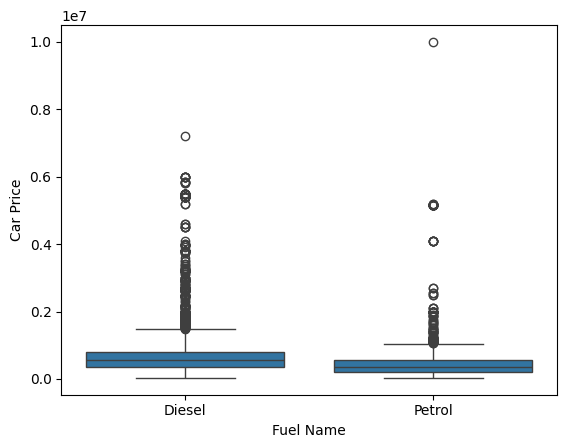

In [354]:
sns.boxplot(x =df.fuel, y = df.selling_price)
plt.ylabel("Car Price")
plt.xlabel("Fuel Name")

**Scatter Plot**

The "year" column and the "transmission" colum are used in a scatter plot to see the relation between their values and the selling price of the cars.

<Axes: xlabel='year', ylabel='selling_price'>

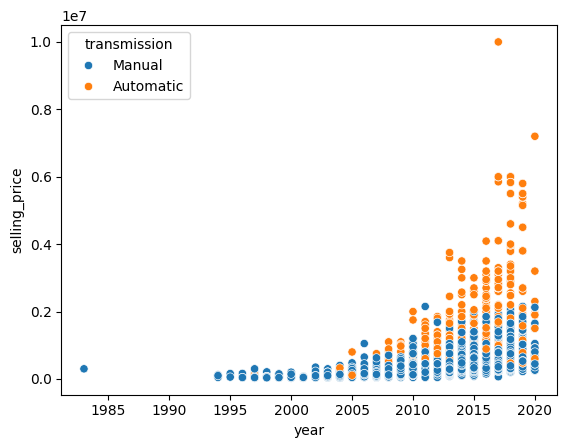

In [355]:
sns.scatterplot(x =df.year, y= df.selling_price, hue=df.transmission)

In addition to the modifications from the instructions, the "name" column will also be label encoded. The reason being that the brand of the cars might have a significant impact on the sell price of the cars and as such, the data of this column needs to explored during EDA phase, and the correlation matrix requires this column to be label encoded.

In [356]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.name = le.fit_transform(df.name)
df.name.unique()



array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [357]:
# Check to see what each number maps to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [358]:
# Saving the names and what they map to in a dictionary to put into model file
name_map = {}
keys = le.classes_
values = df.name.unique()
for key in keys:
    for value in values:
        name_map[key] = value
        values  = np.delete(values, np.where(values == value))
        break
name_map

{'Ambassador': 20,
 'Ashok': 27,
 'Audi': 10,
 'BMW': 11,
 'Chevrolet': 29,
 'Daewoo': 9,
 'Datsun': 26,
 'Fiat': 19,
 'Force': 28,
 'Ford': 4,
 'Honda': 7,
 'Hyundai': 6,
 'Isuzu': 14,
 'Jaguar': 21,
 'Jeep': 22,
 'Kia': 2,
 'Land': 30,
 'Lexus': 3,
 'MG': 23,
 'Mahindra': 17,
 'Maruti': 13,
 'Mercedes-Benz': 16,
 'Mitsubishi': 18,
 'Nissan': 31,
 'Opel': 5,
 'Peugeot': 15,
 'Renault': 8,
 'Skoda': 0,
 'Tata': 1,
 'Toyota': 12,
 'Volkswagen': 24,
 'Volvo': 25}

The "fuel","seller type" and "transmission" columns will also be label encoded for the above reasons, although the impact of these features is unknown.

In [359]:
df.fuel = le.fit_transform(df.fuel)
df.fuel.unique()

array([0, 1])

In [360]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [361]:
df.seller_type = le.fit_transform(df.seller_type)
df.seller_type.unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
8123    1
8124    1
8125    1
8126    1
8127    1
Name: seller_type, Length: 8028, dtype: int32>

In [362]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [363]:
df.transmission  = le.fit_transform(df.transmission)
df.transmission.unique()

array([1, 0])

In [364]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 689.9 KB


**Correlation Matrix**

The correlation matrix shows us how each of the features related to one another and most importantly, how they relate to our label; the selling price of the cars.

<Axes: >

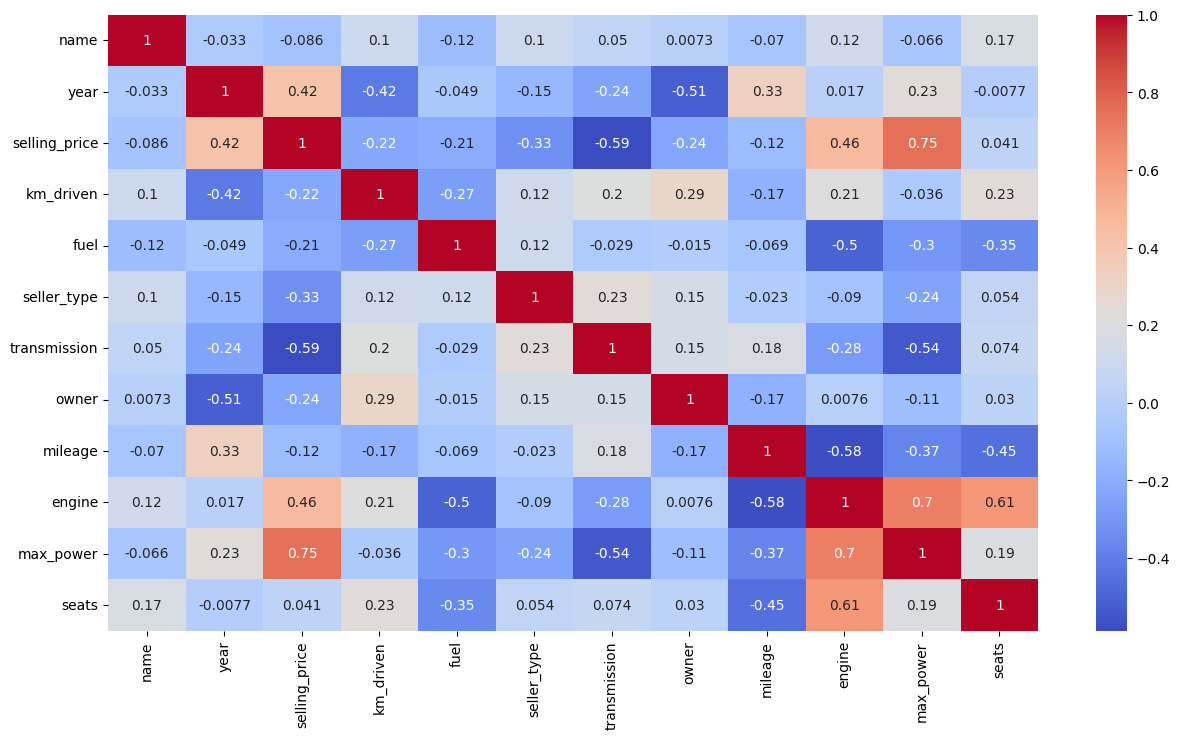

In [366]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

The features year, km_driven, and max power are strong candidates for predicting the selling price of cars. The year is significant because newer cars generally have higher resale values. Km_driven reflects the car's usage, with more mileage often resulting in a lower price. Max power is a good choice over engine power due to their high correlation, with max power still capturing the car's performance. These features are likely to provide a solid foundation for building a reliable model.

**Predictive Power Score**

The predictive power score library is used to more accurately see the correlation results and confirm our assumptions of the relation of the features to the label.

<Axes: xlabel='x', ylabel='y'>

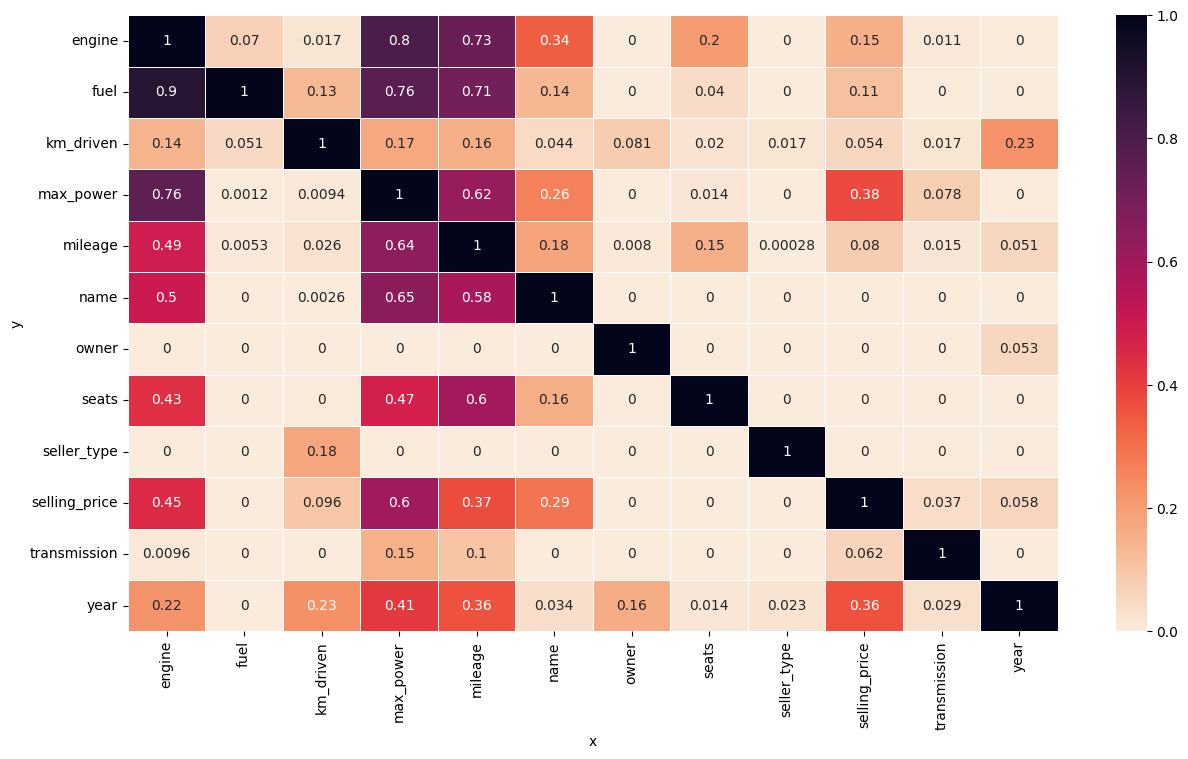

In [367]:
import ppscore as pps
dfcopy = df.copy()# Copying the data frame to avoid manipulating the original data frame
matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns='x',index='y',values = 'ppscore')# Preprocessing using pivot
# Plot
plt.figure(figsize= (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1,cmap='rocket_r', linewidths = 0.5, annot=True)

### 3. Feature Engineering
The step of feature engineering is skipped considering most of the columns do not require to be merged or to produce derivations.

### 4. Feature Selection

The selected features for predicting the selling price of cars are year, km_driven, and max power. The year of the car is a crucial factor, as newer cars typically have higher resale values. Km_driven indicates the car's usage, with higher mileage often leading to a lower selling price. Max power is chosen over engine power due to their high correlation, with max power still effectively representing the car's performance. These features are expected to provide a strong basis for modeling the car's selling price.

In [368]:
x = df[['year', 'km_driven','max_power']]
y = np.log(df["selling_price"])

**Train Test Split**

In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

### 5. Preprocessing

In [370]:
X_train[['year', 'km_driven','max_power']].isna().sum()

year           0
km_driven      0
max_power    169
dtype: int64

In [371]:
X_test[['year', 'km_driven','max_power']].isna().sum()

year          0
km_driven     0
max_power    39
dtype: int64

In [372]:
y_train.isna().sum()

0

In [373]:
y_test.isna().sum()

0

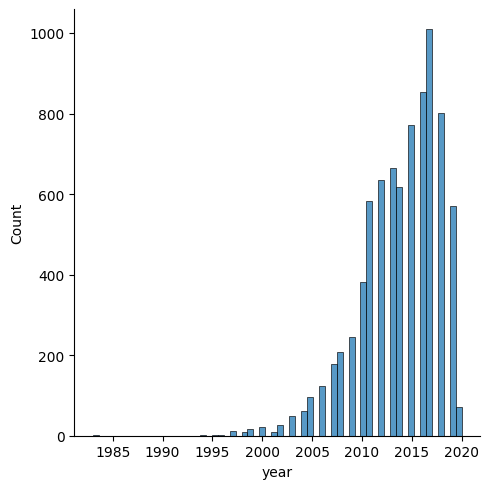

In [374]:
sns.displot(data=df, x='year')

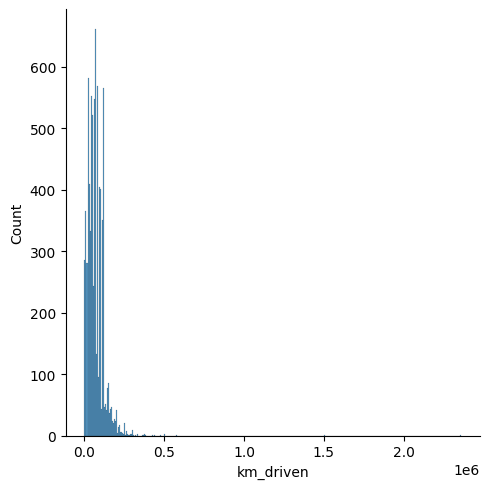

In [375]:
sns.displot(data=df, x='km_driven')

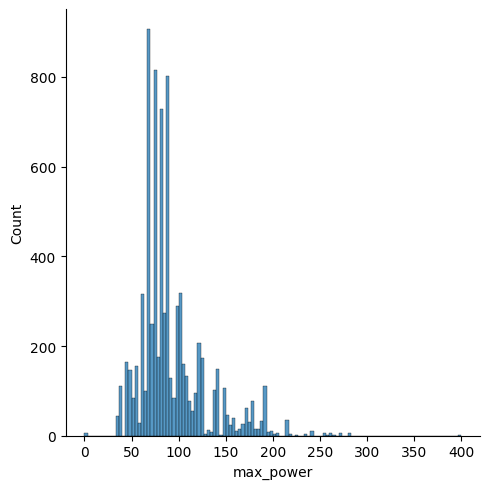

In [376]:
sns.displot(data=df, x='max_power')

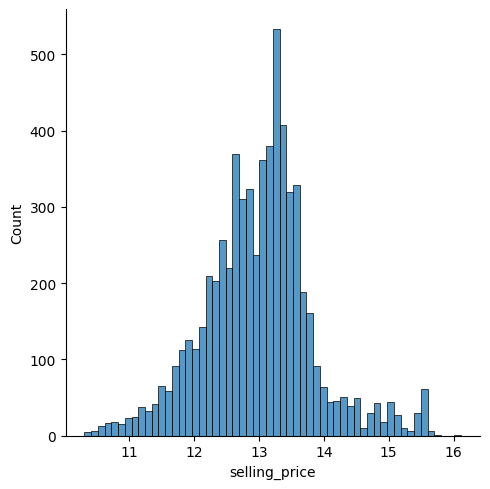

In [377]:
sns.displot(y_train)

In [378]:
# Saving values to put into model file
year_default = X_train['year'].median()
km_driven_default = X_train['km_driven'].median()
max_power_default = X_train['max_power'].mean()

In [379]:
# Training set
# Dropping the name column
# Filling the other columns
X_train['year'].fillna(X_train['year'].median(), inplace=True)
X_train['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [5]:
# Testing set
# Dropping the name column
# Filling the other columns
X_test['year'].fillna(X_train['year'].median(), inplace=True)
X_test['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

NameError: name 'X_test' is not defined

In [381]:
# Doing the same for labels
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [382]:
# Checking values
X_train[['year', 'km_driven','max_power']].isna().sum()

year         0
km_driven    0
max_power    0
dtype: int64

In [383]:
X_test[['year', 'km_driven','max_power']].isna().sum()

year         0
km_driven    0
max_power    0
dtype: int64

In [384]:
y_train.isna().sum()

0

In [385]:
y_test.isna().sum()

0

**Checking outliers**

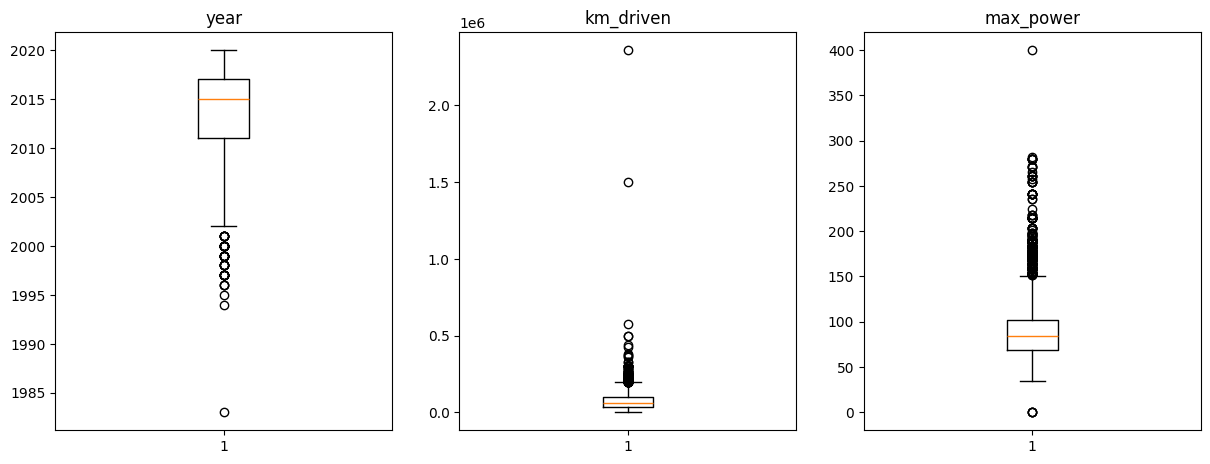

In [386]:
# Create a dictionary of columns.
col_dict = {'year':1,'km_driven':2,'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [387]:
def outlier_count(col, data = X_train):
    
    # Calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # Calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # Count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # Calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [388]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 60
Percent of data that is outlier: 0.93%

---------------km_driven---------------

Number of outliers: 124
Percent of data that is outlier: 1.93%

---------------max_power---------------

Number of outliers: 476
Percent of data that is outlier: 7.41%


**Scaling**

In [389]:
from sklearn.preprocessing import StandardScaler

# Feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [390]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


### 6. Modeling

In [391]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# List of models
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

**KFold**

In [392]:
from sklearn.model_selection import KFold, cross_val_score

# Lists for keeping mse
train_mse = []
test_mse = []

# Defining splits
kfold = KFold(n_splits=10, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.13196783 -0.13295334 -0.13369639 -0.11852537 -0.11626567 -0.1365935
 -0.10811427 -0.10871704 -0.11045912 -0.10383763]; Mean: -0.12011301523986288
SVR - Score: [-0.11187244 -0.09360816 -0.09544572 -0.09660148 -0.10017994 -0.09764059
 -0.11518157 -0.10492374 -0.0977183  -0.09059263]; Mean: -0.10037645683323974
KNeighbors Regressor - Score: [-0.10250524 -0.09912074 -0.09994996 -0.10421888 -0.08805157 -0.10109718
 -0.09892794 -0.10360256 -0.0845062  -0.09193825]; Mean: -0.09739185105958933
Decision-Tree Regressor - Score: [-0.10662874 -0.09631882 -0.10637313 -0.11484108 -0.09341031 -0.10210237
 -0.11054068 -0.12299333 -0.0986957  -0.0996287 ]; Mean: -0.10515328486569994
Random-Forest Regressor - Score: [-0.06468673 -0.07143998 -0.0779776  -0.06903692 -0.06715242 -0.06978833
 -0.07031726 -0.06555456 -0.0670014  -0.06170233]; Mean: -0.06846575214159474


**Grid search**

In [393]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5,10,None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train);

In [394]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [395]:
# Find grid_search's best score
best_mse = grid.best_score_

In [396]:
best_mse

-0.06729726511635395

In [397]:
# Save the model,scaler and values together
model = {
    'model': grid,
    'scaler': scaler,
    'year_default' : year_default,
    'km_driven_default' : km_driven_default,
    'max_power_default' : max_power_default
}

### 7. Testing

In [398]:
from sklearn.metrics import mean_squared_error
yhat = grid.predict(X_test)
#yhat = np.exp(yhat) 
# Does not need to be transformed since grid already gives a log transformed yhat
mean_squared_error(y_test, yhat)

0.06587969658820271

### 8. Feature Importance

**Algorithm way**

In [399]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.48658803, 0.02528051, 0.48813146])

<BarContainer object of 3 artists>

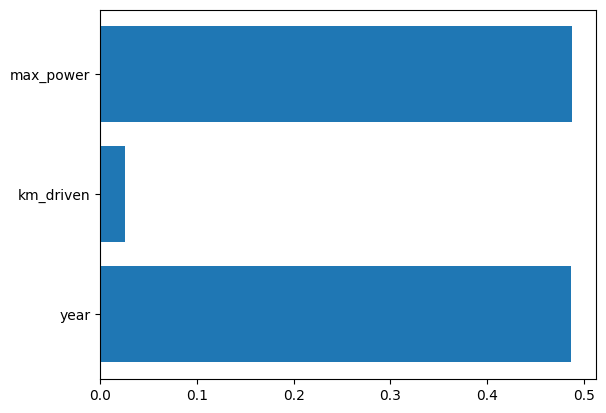

In [400]:
# Plotting
plt.barh(x.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

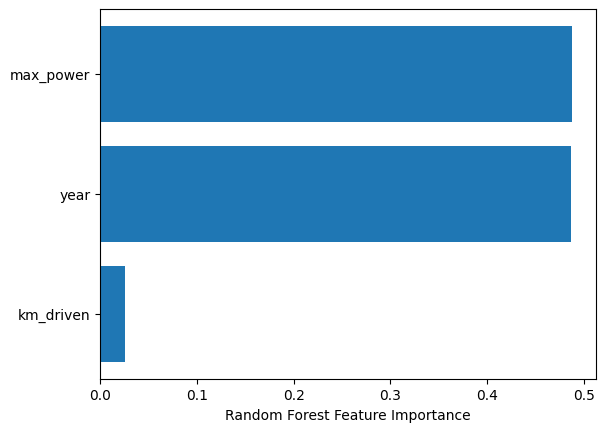

In [401]:
# Sorting the feature importance
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**Permutation way**

Text(0.5, 0, 'Random Forest Feature Importance')

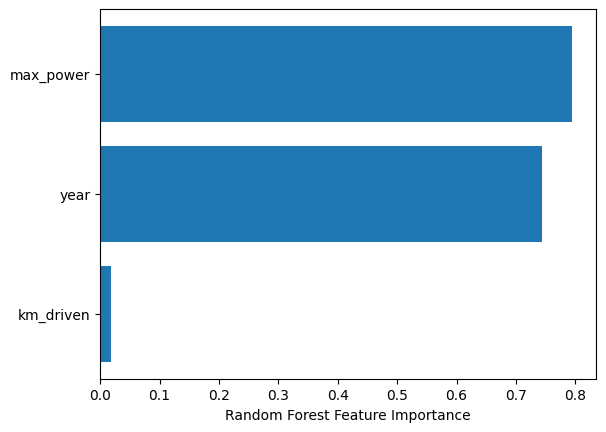

In [402]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

**Shap way**

In [403]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

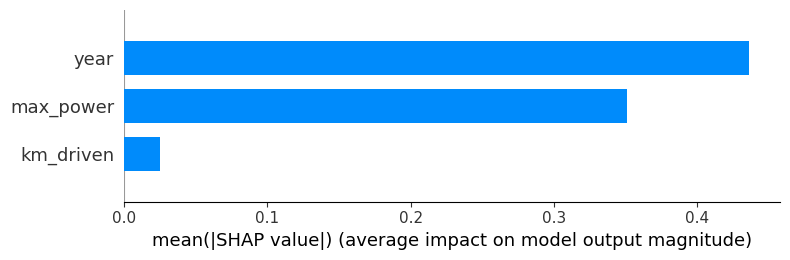

In [404]:
# Shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = x.columns)

### 9. Inference

In [405]:
import pickle

# Save the model to disk
filename = 'car_price_old.model'
pickle.dump(model, open(filename, 'wb'))

In [406]:
# Load the model from disk
loaded_data = pickle.load(open(filename, 'rb'))

In [407]:
# Loading the model and scaler to test
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [408]:
# Test the model with a sample input
df[['year', 'km_driven','max_power', 'selling_price']].loc[2342]

year               2008.0
km_driven         35000.0
max_power            78.9
selling_price    220000.0
Name: 2342, dtype: float64

In [409]:
#['year', 'km_driven','max_power'] 
sample = np.array([[2010, 200000,50]])

# Scaling the sample data to feed the model
sample_scaled = loaded_scaler.transform(sample)
sample_scaled

array([[-0.95021576,  2.21001051, -1.18464438]])

In [410]:
# Predicting and taking the exponent to show the predicted car price
predicted_car_price = loaded_model.predict(sample_scaled)
predicted_car_price = np.exp(predicted_car_price)
predicted_car_price

array([93547.16863704])

### Assignment Report
**Features**

The features chosen were 'name', 'engine' and 'mileage'. The 'name' was chosen as a feature because I believe most people would care what brand the car is when they are buying a car and the correlation matrix confirms my belief. The 'engine' was chosen as a feature because people will definitely care what their engine power or horse power is. The correlation matrix reflects this assumption, and even though 'max_power' is more correlated to the selling price, I believe most people only know about the engine power and decided to choose it over max power. The engine power and max power are also very related to each other. The 'mileage' feature was chosen because due to fuel prices, most people would care about how fuel efficient their car is.

The algorithm chosen was Random Forest Regressor. Decision Tree Regressor also showed a similar but slightly worse perfomance during cross validation. I believe the following reasons are why Random Forest performed best: Linear Regression and SVR assumes linear relation between features and label while RF handles both linear and non-linear relations. RF is also more robust towards outliers and the 'engine' feature has around 15% outliers. I believe RF being an ensemble method also contributed towards it being the best performing algorithm.

The model's prediction results, I believe, are satisfactory. The three chosen features all contribute one way or another towards determining the selling price of a car. The engine power is shown to be the most important feature and I believe that is because for the same level of brands (e.g. Toyota, Honda or Hyundai), people would look at the engine power of the car to determine the price. The model file contains the model, the scaler and the values needed to fill in missing fields that a user does not provide.